In [1]:
''' 
This file reads json file in project/hand_pose/Annotation.json and output project/hand_pose/hand_labels_gamma.csv
'''

' \nThis file reads json file in project/hand_pose/Annotation.json and output project/hand_pose/hand_labels_gamma.csv\n'

In [2]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import json
from pprint import pprint
from matplotlib import pyplot as plt
from PIL import Image
import sys
import numpy as np
import matplotlib.patches as patches
import cv2
import pandas as pd
import warnings
warnings.simplefilter("ignore")

# Get 5600 images in gamma change

In [3]:
base_dir = "../hand_pose"
image_dir = os.path.join(base_dir, 'Color')
target_dir = os.path.join(base_dir, 'Gamma_imgs')

In [4]:
img_list = os.listdir(image_dir)
img_name = [img[:-4] for img in img_list]

In [5]:
img_amount = len(img_list)
print(img_amount)

111


In [6]:
# Following code use tiny dataset for script test

In [7]:
for i in range(1, img_amount, 10):
    img = cv2.imread(os.path.join(image_dir,img_list[i]))
    res = np.uint8(np.clip((2.8 * img + 10), 0, 255))
    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)

In [8]:
# Following code use real hand_pose dataset with folder "Color" from assignment 1&3

In [9]:
'''
for i in range(1, 14000, 10):
    img = cv2.imread(os.path.join(image_dir,img_list[i]))
    res = np.uint8(np.clip((2.8 * img + 10), 0, 255))
    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)
'''

"\nfor i in range(1, 14000, 10):\n    img = cv2.imread(os.path.join(image_dir,img_list[i]))\n    res = np.uint8(np.clip((2.8 * img + 10), 0, 255))\n    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)\n"

In [10]:
'''
for i in range(14000, 28000, 10):
    img = cv2.imread(os.path.join(image_dir,img_list[i]))
    res = np.uint8(np.clip((0.2 * img + 100), 0, 255))
    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)
'''

"\nfor i in range(14000, 28000, 10):\n    img = cv2.imread(os.path.join(image_dir,img_list[i]))\n    res = np.uint8(np.clip((0.2 * img + 100), 0, 255))\n    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)\n"

In [11]:
'''
for i in range(28000, 42000, 10):
    img = cv2.imread(os.path.join(image_dir,img_list[i]))
    res = np.uint8(np.clip((0.25 * img + 10), 0, 255))
    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)
'''

"\nfor i in range(28000, 42000, 10):\n    img = cv2.imread(os.path.join(image_dir,img_list[i]))\n    res = np.uint8(np.clip((0.25 * img + 10), 0, 255))\n    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)\n"

In [12]:
'''
for i in range(42000, 56000, 10):
    img = cv2.imread(os.path.join(image_dir,img_list[i]))
    res = np.uint8(np.clip((0.5 * img + 100), 100, 155))
    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)
'''

"\nfor i in range(42000, 56000, 10):\n    img = cv2.imread(os.path.join(image_dir,img_list[i]))\n    res = np.uint8(np.clip((0.5 * img + 100), 100, 155))\n    cv2.imwrite(os.path.join(target_dir, img_name[i] +'_gamma.jpg'), res)\n"

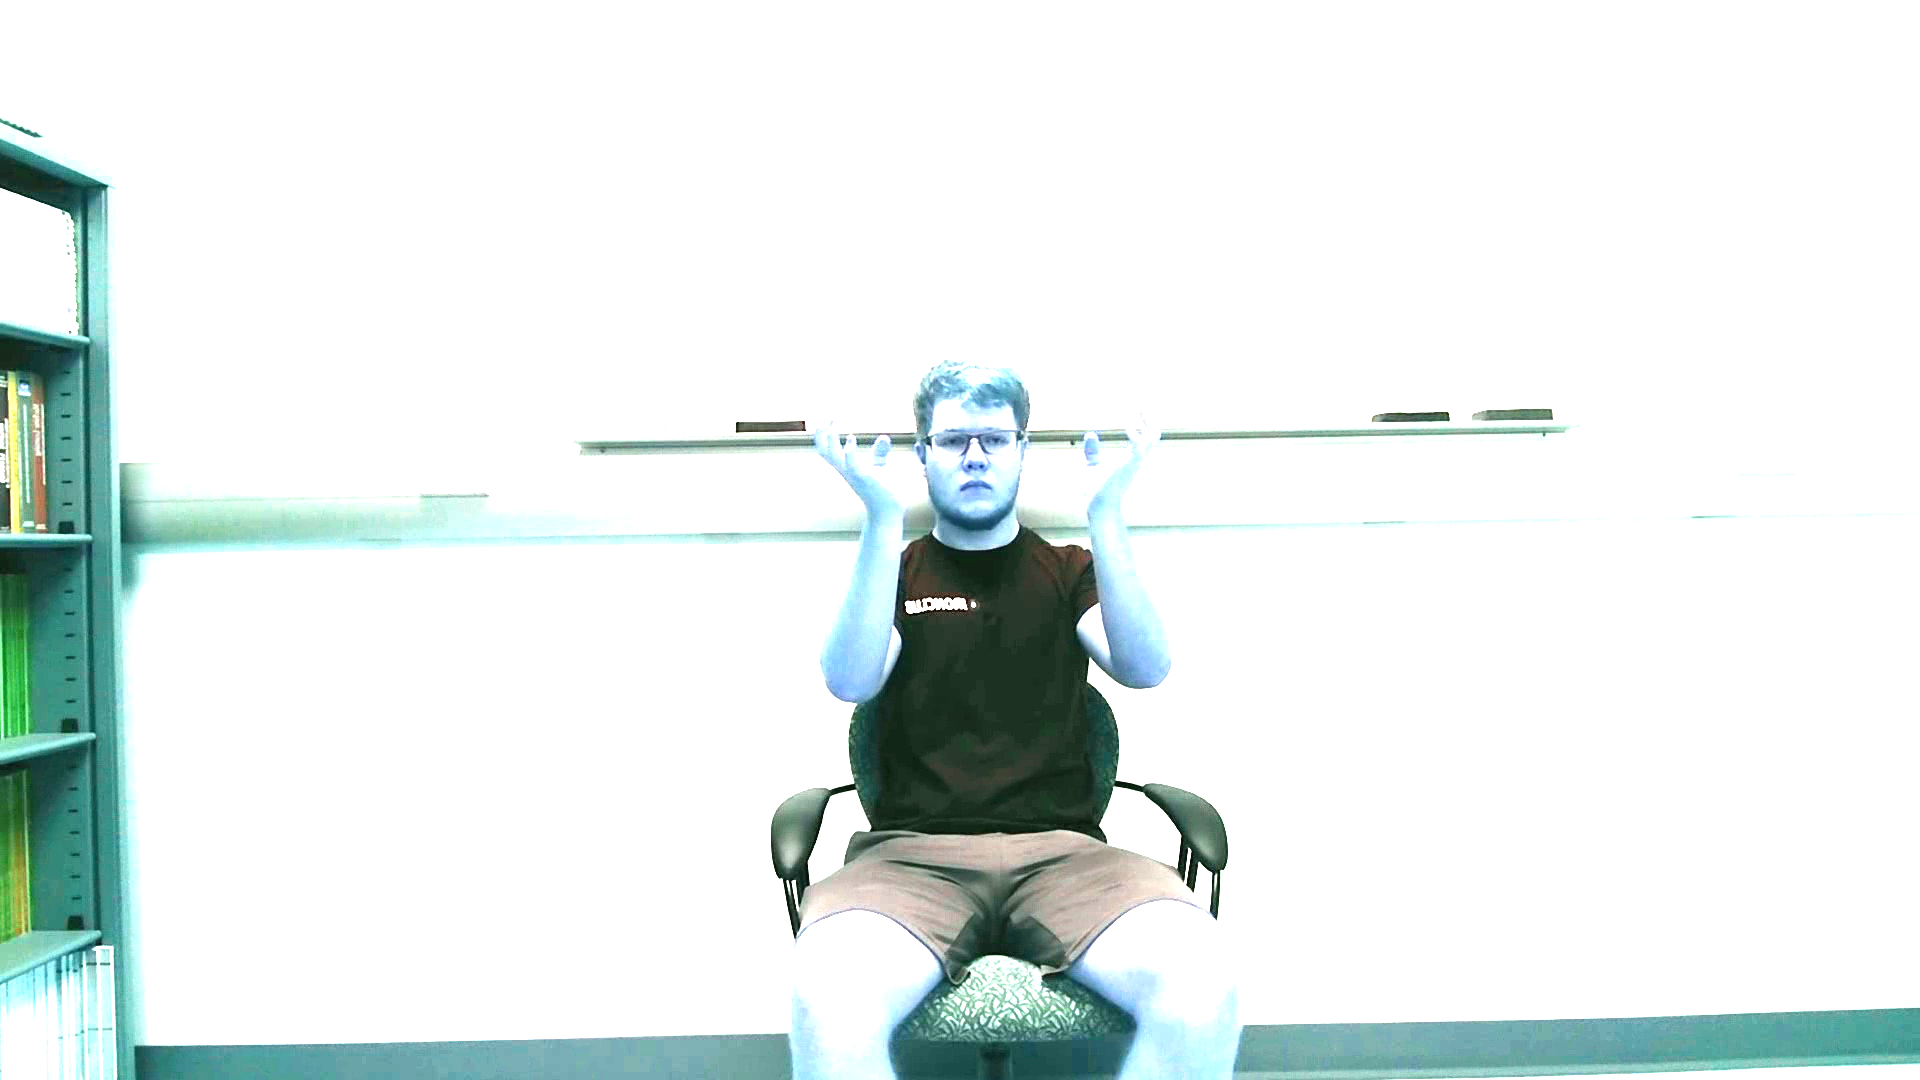

In [13]:
img = cv2.imread(os.path.join(image_dir,img_list[1]))
res = np.uint8(np.clip((2.8 * img + 10), 0, 255))
Image.fromarray(res)

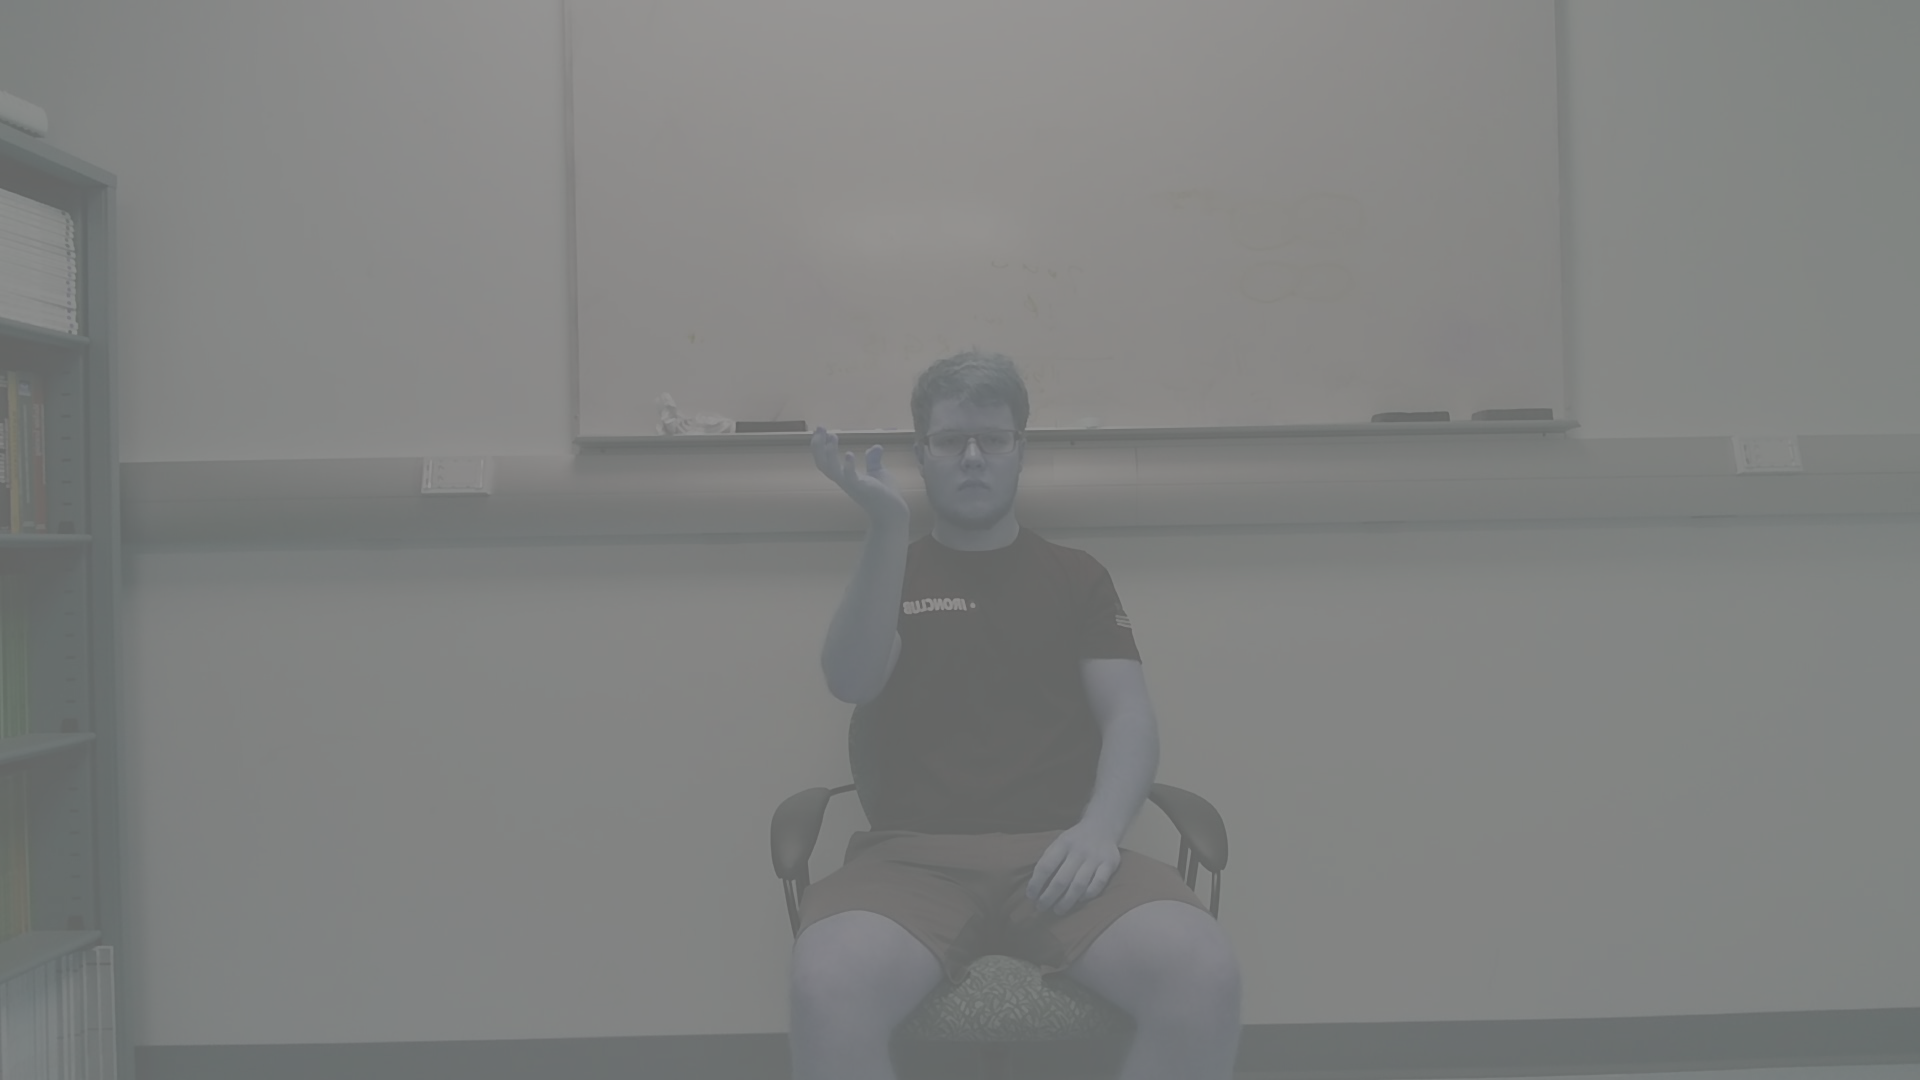

In [14]:
img = cv2.imread(os.path.join(image_dir,img_list[3]))
res = np.uint8(np.clip((0.2 * img + 100), 0, 255))
Image.fromarray(res)

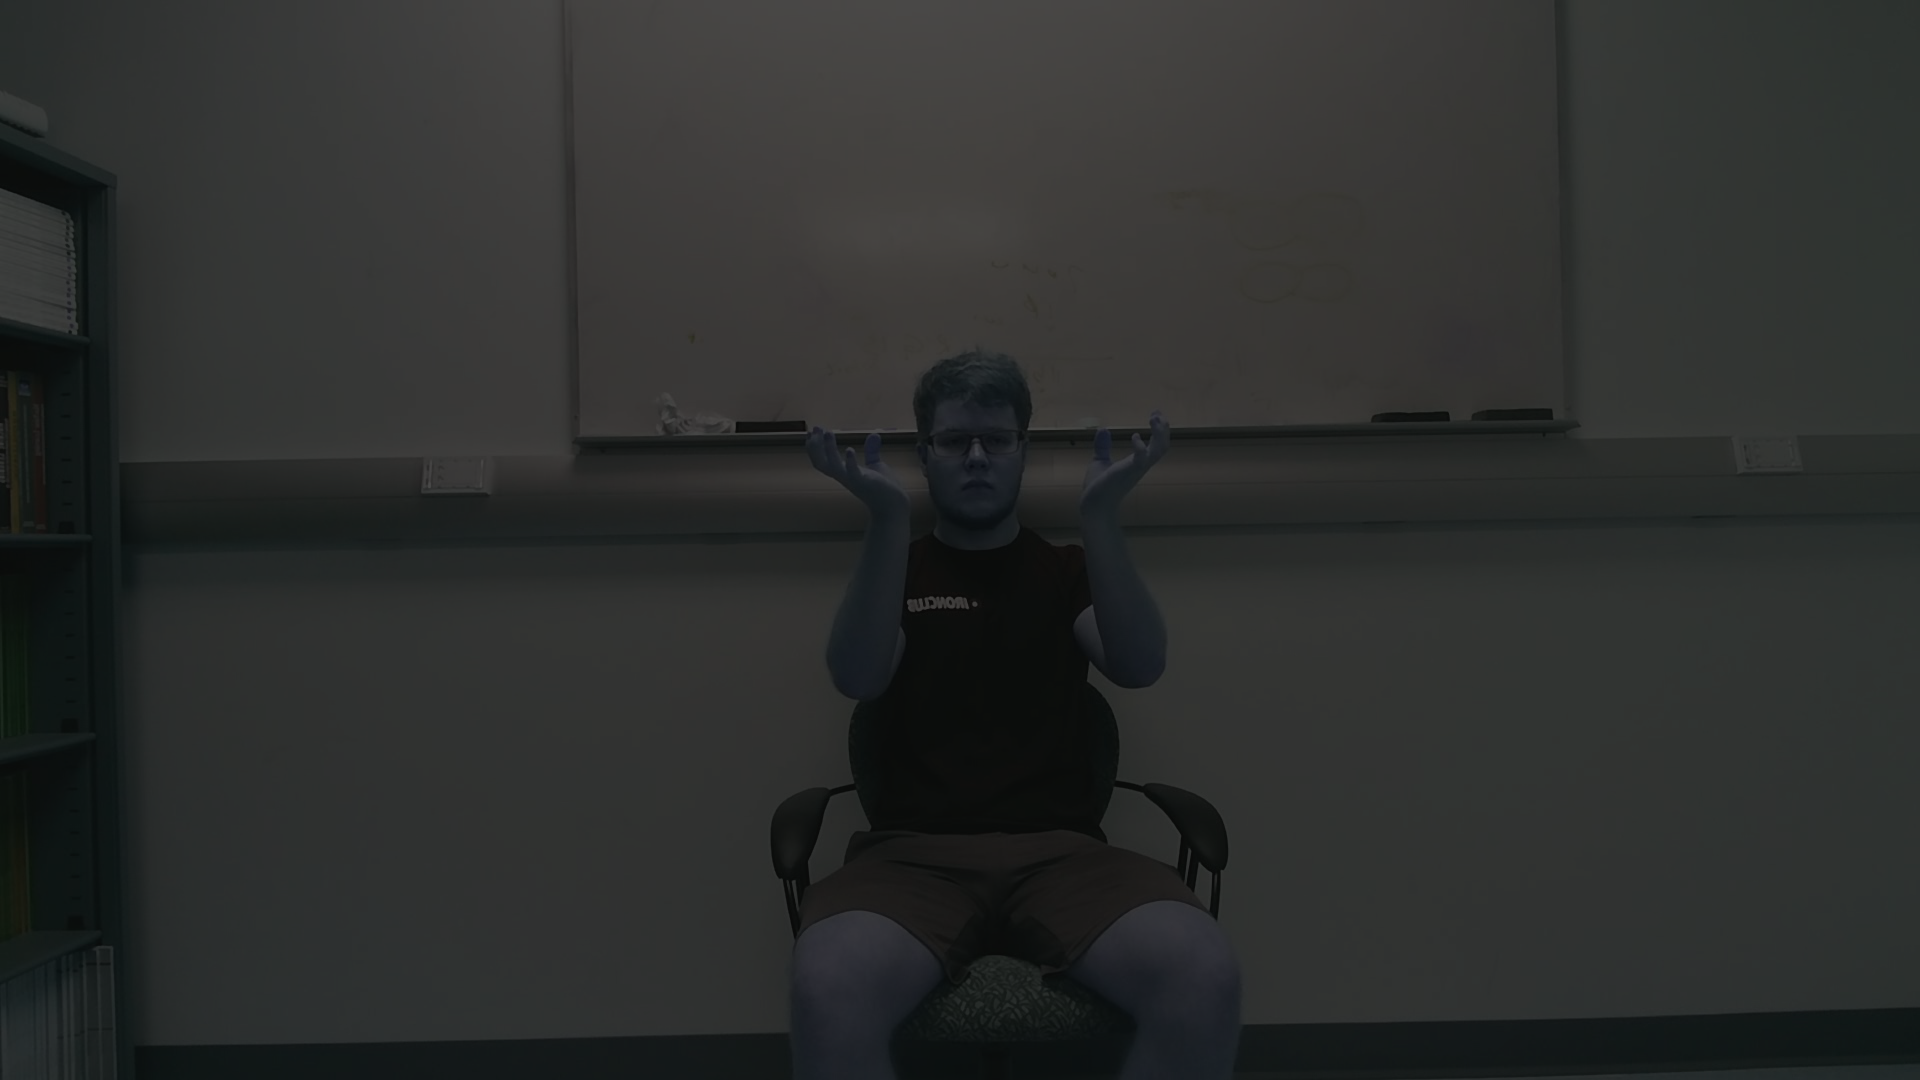

In [15]:
img = cv2.imread(os.path.join(image_dir,img_list[4]))
res = np.uint8(np.clip((0.25 * img + 10), 0, 255))
Image.fromarray(res)

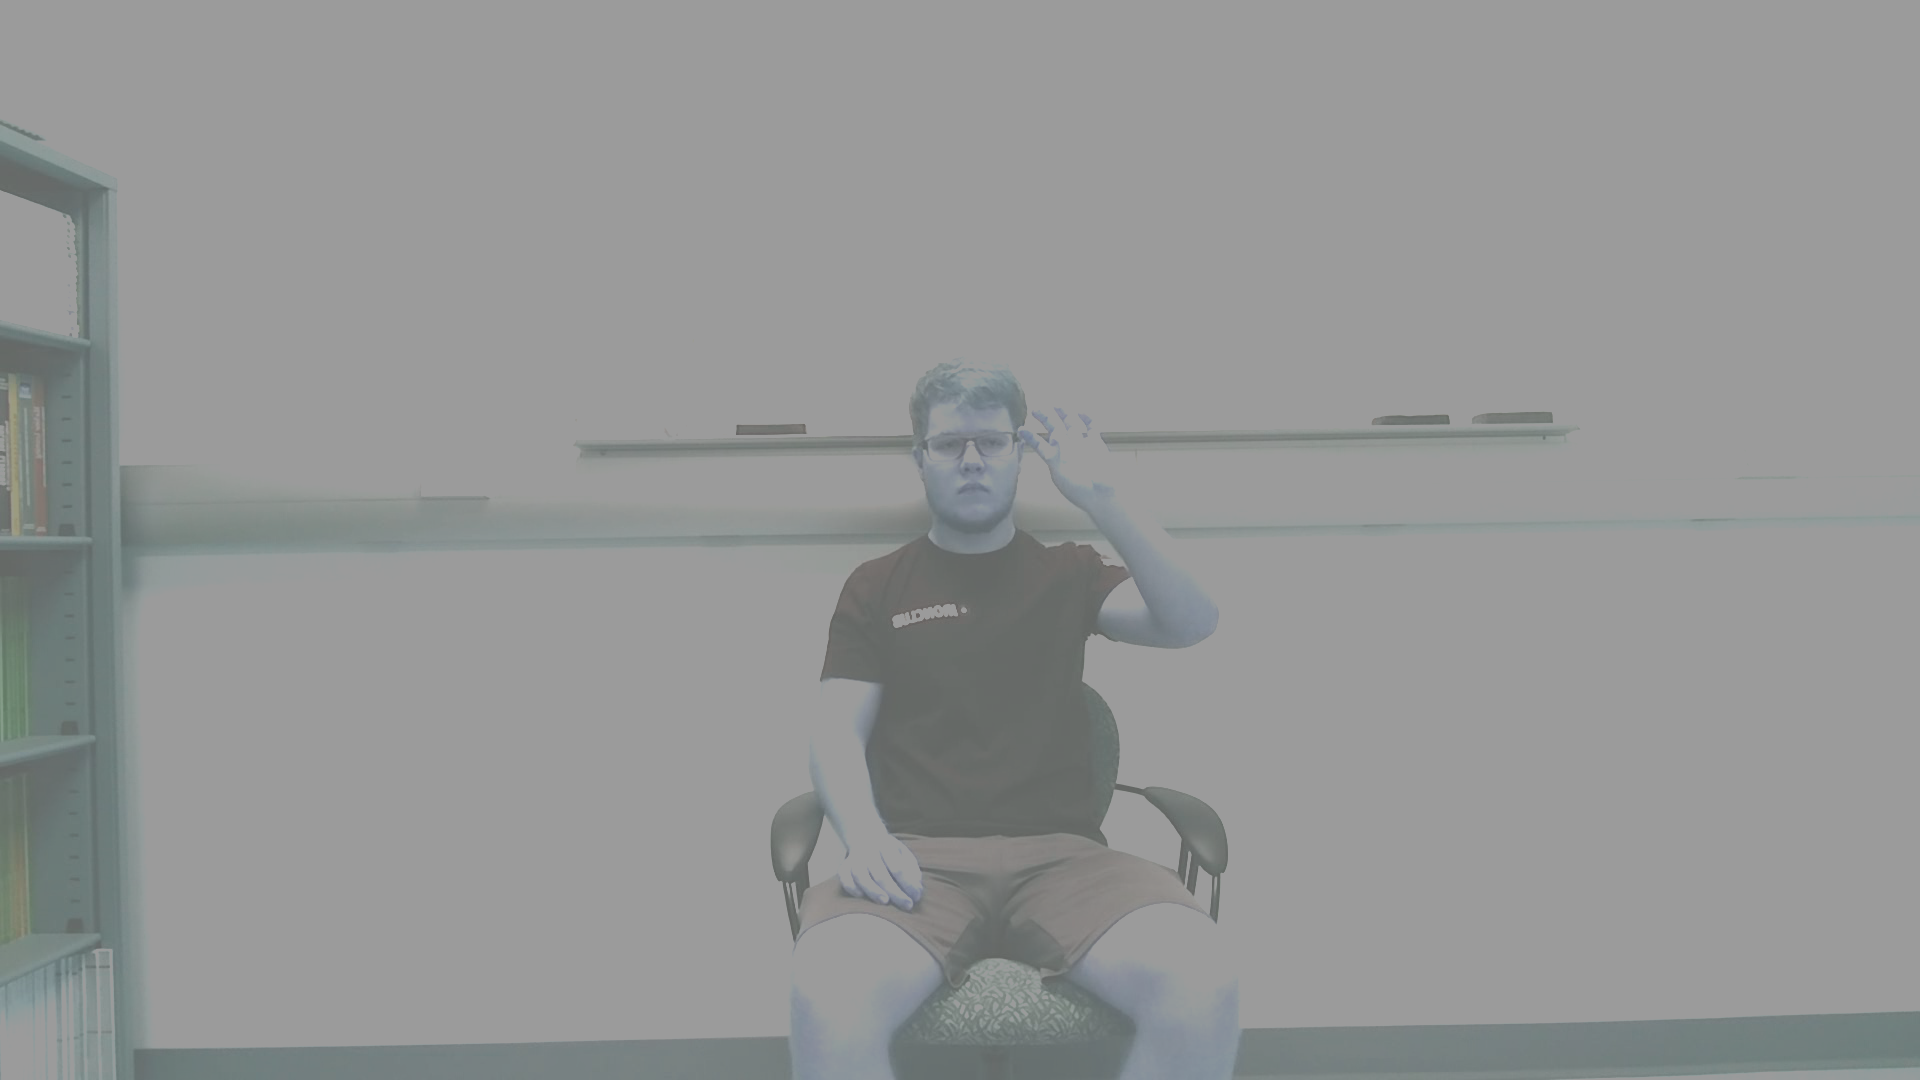

In [16]:
img = cv2.imread(os.path.join(image_dir,img_list[5]))
res = np.uint8(np.clip((0.5 * img + 100), 100, 155))
Image.fromarray(res)

# json to csv for those 5600 images

In [17]:
tensorflow_path = "phase1_models"
sys.path.append(tensorflow_path + "/research")
sys.path.append(tensorflow_path + "/research/object_detection")
sys.path.append(tensorflow_path + "/research/object_detection/utils")
from utils import label_map_util
from utils import visualization_utils as vis_util

In [18]:
base_dir = "../hand_pose"
json_file = os.path.join(base_dir, 'annotation.json')
csv_file_gamma = os.path.join(base_dir, 'hand_labels_gamma.csv')
segment_length = 20
gamma_imgs_dir = os.path.join(base_dir, 'Gamma_imgs')

In [19]:
gamma_imgs_list = os.listdir(gamma_imgs_dir)

In [20]:
gamma_imgs_names = [img[:-10] for img in gamma_imgs_list]

In [21]:
with open(json_file) as f:
    data = json.load(f)
pprint(f)

<_io.TextIOWrapper name='../hand_pose/annotation.json' mode='r' encoding='UTF-8'>


In [22]:
len(data)

94126

In [23]:
len(gamma_imgs_list)

11

In [24]:
def paint_boundary(index):
    img = cv2.imread(os.path.join(gamma_imgs_dir,gamma_imgs_list[index]))
    if gamma_imgs_names[index]+"_L" in data:
        pos = record_boundary(index, "_L")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])
    if gamma_imgs_names[index]+"_R" in data:
        pos = record_boundary(index, "_R")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])     
    return img

In [25]:
def record_boundary(index, direction):
    name = gamma_imgs_names[index]+direction
    xy = np.array(data[name])
    x_arr = xy[:,0]
    y_arr = xy[:,1]
    segment_length = 20
    x_max = max(x_arr) + segment_length
    y_max = max(y_arr) + segment_length
    x_min = min(x_arr) - segment_length
    y_min = min(y_arr) - segment_length
    return [(int(x_min), int(y_min)), (int(x_max), int(y_max))]

In [26]:
def return_value(index, direction):
    pos = record_boundary(index, direction)
    xmin = pos[0][0]
    ymin = pos[0][1]
    xmax = pos[1][0]
    ymax = pos[1][1]
    value = (gamma_imgs_names[index]+'_gamma.jpg', #+direction,
             xmax-xmin,
             ymax-ymin,
             'hand',
             xmin,
             ymin,
             xmax,
             ymax
             )
    return value

In [27]:
xml_list_gamma = []
#for xml_file in glob.glob(path + '/*.xml'):
for index, img in enumerate(gamma_imgs_names):
    if img + '_R' in data:
        xml_list_gamma.append(return_value(index, '_R'))
    if img + '_L' in data:
        xml_list_gamma.append(return_value(index, '_L'))
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df_gamma = pd.DataFrame(xml_list_gamma, columns=column_name) #use panda
#print(xml_df)

In [28]:
len(xml_list_gamma)

17

In [29]:
xml_df_gamma.to_csv(csv_file_gamma, index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


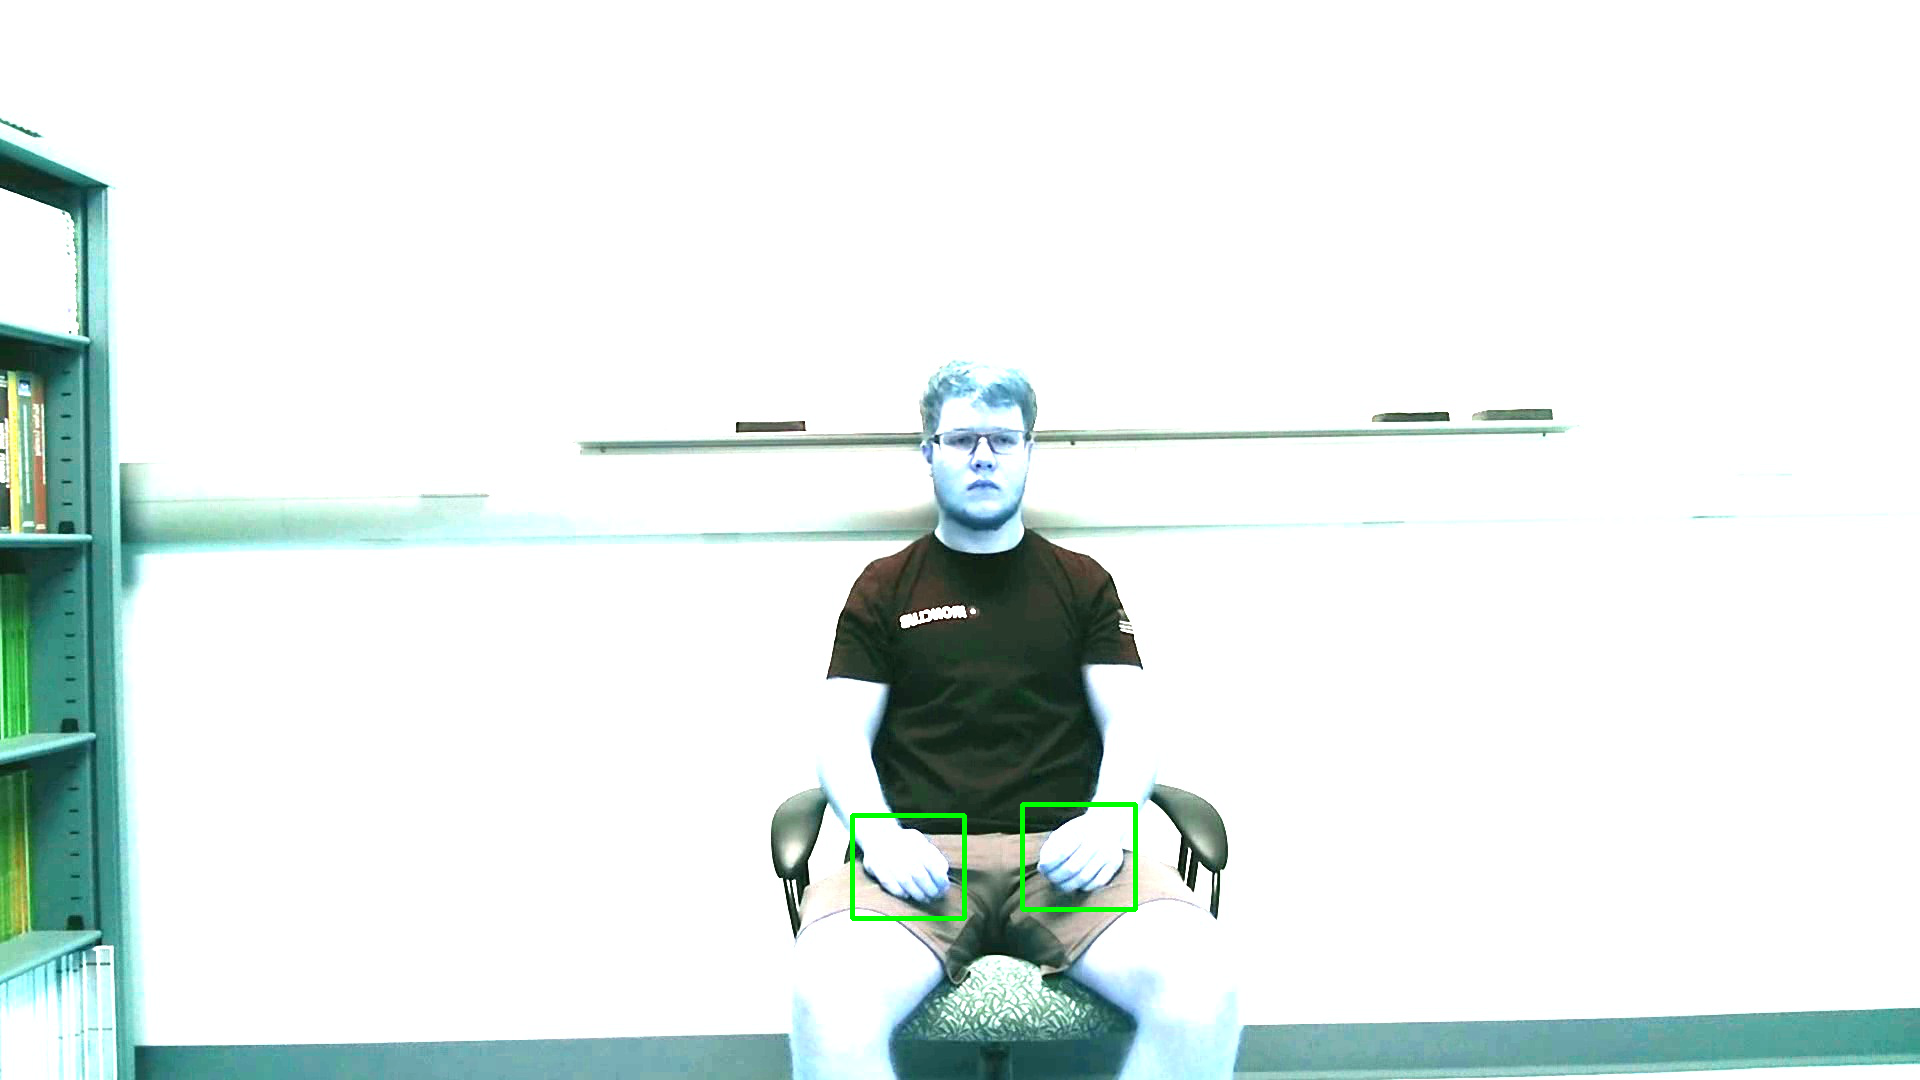

In [30]:
Image.fromarray(paint_boundary(2))

# Append 5600 images csv to hand_labels.csv

In [31]:
base_dir = "../hand_pose"
csv_file_gamma = os.path.join(base_dir, 'hand_labels_gamma.csv')
csv_file = os.path.join(base_dir, 'hand_labels.csv')

In [32]:
labels_gamma = pd.read_csv(csv_file_gamma)

In [33]:
labels = pd.read_csv(csv_file)

In [34]:
len(labels_gamma)

17

In [35]:
len(labels)

154

In [36]:
results = pd.concat([labels,labels_gamma])
results.to_csv(os.path.join(base_dir, 'hand_labels.csv'))

In [37]:
len(results)

171